# Homework 2

Oscar Sjöstrand

### Apartment Prices

In this section, we will explore a data set from Booli which describes apparment sales in Ekhagen in Stockholm. We are interested in finding the price per square meter and finding the five appartments with the highest price per square meter.

#### Q1

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv("Booli_sold.csv")

In [19]:
"Extract the columns"
price = df["soldPrice"]
sq_m = df["livingArea"]
"Calculation"
ppsqm = price/sq_m

In [20]:
"Add price_per_sq to the df"
df["ppsqm"] = ppsqm

#### Q2

In [21]:
five_most_expensive = df.sort_values(by="ppsqm", ascending=False)[:5]
five_most_expensive

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
67,1595000,1464.0,24.0,1.0,2016-01-07 14:51:06,1935.0,Lägenhet,2018259,2016-01-21,2500000,...,18.055270,NaN,Stockholm,Stockholms län,161,Notar,1566,Broker,http://www.notar.se/,104166.666667
50,1890000,1464.0,24.0,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,2450000,...,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,102083.333333
54,1795000,1374.0,23.0,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,2300000,...,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/,100000.000000
34,1750000,1144.0,25.0,1.0,2017-05-18 16:20:57,1936.0,Lägenhet,2330886,2017-06-01,2210000,...,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,88400.000000
55,1895000,1522.0,26.9,1.0,2016-04-01 22:56:37,1968.0,Lägenhet,2067384,2016-04-19,2300000,...,18.058529,True,Stockholm,Stockholms län,298,Notar,1566,Broker,http://www.notar.se/,85501.858736


We see that the apparpmets with the highest price per square meter is 67, 50, 54, 34 and 55.

In [138]:
mean_ppsqm = np.mean(ppsqm)
mean_ppsqm

54127.43692133397

Using the mean() function from numpy we see that the avrage ppsqm is about 54130 kr (asumtion on kr).

#### Q4

Text(0, 0.5, 'Rent')

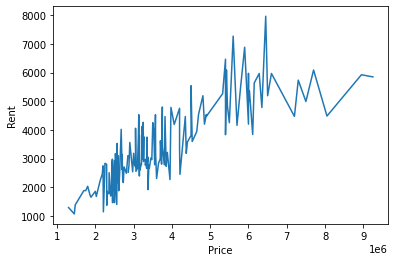

In [139]:
import matplotlib.pyplot as plt
df = df.sort_values(by="soldPrice")
plt.plot(df["soldPrice"], df["rent"])
plt.xlabel("Price")
plt.ylabel("Rent")

An interesting aspect of the data is the relation between rent and price. We see that the rent increases when the price of the apartment increases but, seems to stagnate at a rent price of around 6000 kr.  

## The Swedish Election of 2018

The data set in this section describes the swedish election 2018. We are interested in finding the number of valid votes in Stockholms län. We are also interersted in which municipality the social democrats had the hihgest voting percentage. Lastly we are interested in which three municipalities had the highest participation.

#### Q1

In [3]:
df = pd.read_csv("2018_R_per_kommun.csv", sep=";")
print(df)

     LÄNSKOD  KOMMUNKOD         LÄNSNAMN      KOMMUNNAMN      M      C     L  \
0          1         14   Stockholms län  Upplands Väsby  23,11   6,26  5,66   
1          1         15   Stockholms län      Vallentuna  28,29  10,11  7,73   
2          1         17   Stockholms län       Österåker  29,68   9,35  7,48   
3          1         20   Stockholms län          Värmdö  27,49   9,76   6,4   
4          1         23   Stockholms län        Järfälla  23,96   6,31  6,04   
..       ...        ...              ...             ...    ...    ...   ...   
285       25         80  Norrbottens län           Luleå  15,38   7,53  4,37   
286       25         81  Norrbottens län           Piteå  11,82   7,49  2,52   
287       25         82  Norrbottens län           Boden  14,32   6,23  3,61   
288       25         83  Norrbottens län       Haparanda  12,79   9,61  1,86   
289       25         84  Norrbottens län          Kiruna  10,71   5,38  2,51   

       KD      S      V  ...  TRP  VL-S

In [4]:
sum_sthlm = df[df['LÄNSNAMN'] == 'Stockholms län']["RÖSTER GILTIGA"].sum()
sum_sthlm

1426237

We use the sum() function in numpy to sum over the column "RÖSTER GILTIGA" to fint that the total number of legitimate votes are 1 426 237

#### Q2

In [5]:
# Replace the , with . and transforming into float values
Clean_S = []
for i in df["S"].copy():
    i = float(i.replace(",", "."))
    Clean_S.append(i)
df["S"] = Clean_S

In [6]:
# Find the kommun with the higest S voting percentage
most_S = df.sort_values(by="S", ascending=False)[:1]
most_S

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
188,17,62,Värmlands län,Munkfors,"8,33","8,12","2,91","3,93",52.18,"6,11",...,NaN,NaN,NaN,NaN,"1,02",NaN,2340,2364,2777,"85,13"


We see that Munkfors were the kommun with the highest percentage of S voters namely 52.18%

#### Q3

In [7]:
Clean_VAL = []
for i in df["VALDELTAGANDE"].copy():
    i = float(i.replace(",", "."))
    Clean_VAL.append(i)
df["VALDELTAGANDE"] = Clean_VAL

In [8]:
df = df.sort_values(by="VALDELTAGANDE", ascending = False)
df.head(3)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
103,12,62,Skåne län,Lomma,"33,16","9,33","9,97","6,38",16.69,"2,54",...,NaN,NaN,NaN,NaN,"0,51","0,04",16401,16492,17570,93.86
59,6,43,Jönköpings län,Habo,"19,73","8,77","4,22","15,13",23.74,"3,91",...,NaN,NaN,NaN,"0,06","0,88","0,06",7746,7825,8382,93.35
98,12,33,Skåne län,Vellinge,"39,56","7,24","7,26","7,45",10.58,"1,31",...,0,NaN,NaN,"0,02","0,4","0,04",25245,25360,27231,93.13


## Predicting Strokes

Finally we will explore a dataset describing some relevalt medical information about stroke victims. We want to find a distribution of stroke frequency over the ages. 

45.0

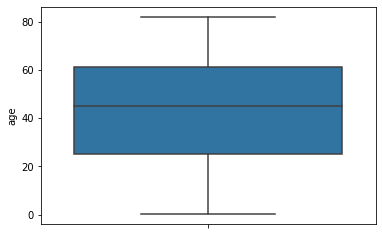

In [41]:
import seaborn as sns
df = pd.read_csv("stroke-data.csv")
sns.boxplot(data = df, y = 'age')
median = df['age'].median()

We see that the median age is 45 and the upper quartile is slghtly smaller indicating a higher frequency of stroke at higher ages. 